# Analyze an example data set

In [1]:
# Load modules we'll need.

from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
%matplotlib osx

## Step 1: Load the data and look at it.

**Q.** Do the data from the two electrodes appear related?

### Conclusions

* 
* 

In [2]:
# Load the data.

data = loadmat('ECoG-1.mat')  # Load the data,
E1 = data['E1']               # ... from the first electrode,
E2 = data['E2']               # ... and from the second electrode.
t = data['t'][0]              # Load the time axis
K = np.size(E1,0)             # Store number of trials.
N = np.size(E1,1)             # Store number of observations.
dt = t[1]-t[0]                # Store sampling interval.

(100, 500)


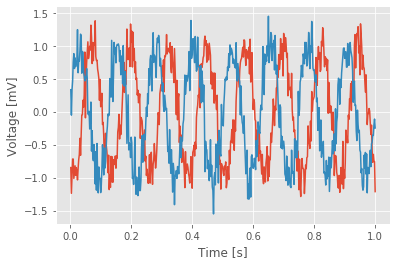

In [3]:
# Look at it for a single trial.

print(E1.shape)

plt.plot(t,E1[0,:])
plt.plot(t,E2[0,:])
plt.xlabel('Time [s]');
plt.ylabel('Voltage [mV]');

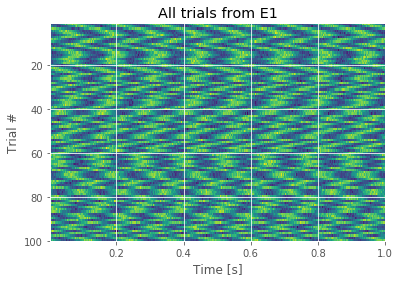

In [4]:
# Look at many trials for one electrode.

plt.imshow(E1,                             # ... and show the image,
           extent=[min(t), max(t), K, 1],  # ... with meaningful axes,
           aspect='auto')                  # ... and a nice aspect ratio
plt.xlabel('Time [s]')
plt.ylabel('Trial #');
plt.title('All trials from E1');

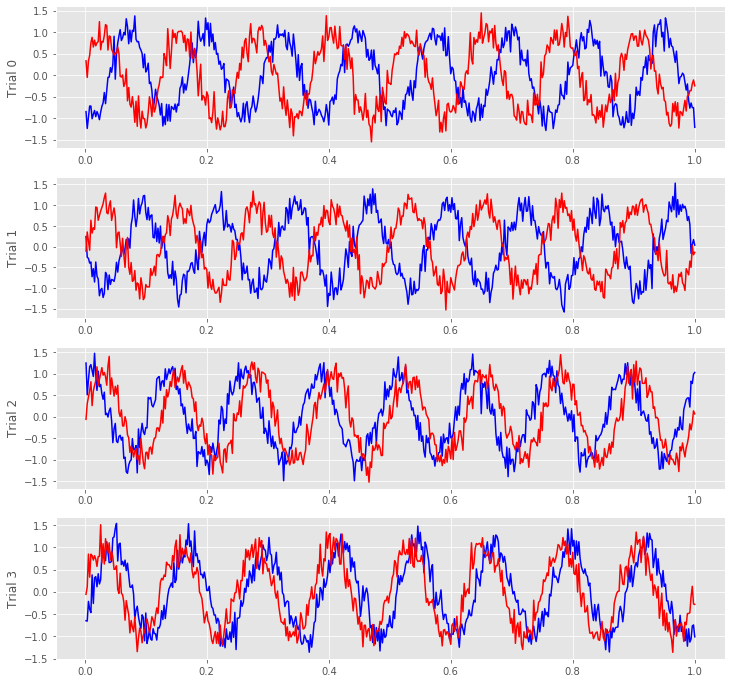

In [5]:
# Look at a couple of trials.

f, a = plt.subplots(4, 1, figsize=(12, 3*4))
for j in range(4):
    a[j].plot(t, E1[j], 'b')            # Plot the data from trial j of one electrode,
    a[j].plot(t, E2[j], 'r')            # ... and trial j of the other electrode.
    a[j].set_ylabel('Trial ' + str(j))

## Compute the cross-covariance for the *first trial*.

**Q.** What do you find? Are the data from the two electrodes "coupled" for the first trial?

### Conclusions

* 
* 

In [ ]:
x = E1[0,:] - np.mean(E1[0,:])  # Define one time series,
y = E2[0,:] - np.mean(E2[0,:])  # ... and another.
xc=1/N*np.correlate(x,y,2)      # ... and compute their cross covariance.
lags = np.arange(-N+1,N)        # Create a lag axis,
plt.plot(lags*dt,xc)            # ... and plot the cross covariance vs lags in time.

plt.xlim([-0.2, 0.2])
plt.xlabel('Lag [s]')
plt.ylabel('Cross covariance');
plt.title('Cross covariance between two electrodes during the first trial');

### Compute the trial-averaged cross-covariance (averaged over all trials).

**Q.** What do you find? Are the data from the two electrodes consistently "coupled" across trials?

### Conclusions

* 
* 

In [ ]:
XC = np.zeros([K, 2 * N - 1])                   # Declare empty vector for cross cov.
for k in range(K):                              # For each trial,
    x = E1[k] - E1[k].mean()                    # ...get data from one electrode,
    y = E2[k] - E2[k].mean()                    # ...and the other electrode,
    XC[k] = 1 / N * np.correlate(x, y, 'full')  # ...compute cross covariance.

f, (a1, a2) = subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)    
a1.plot(lags * dt, XC.mean(0))					# Plot cross covariance vs lags in time.
[a2.plot(lags * dt, XC[k]) for k in range(4)]   # Also, plot the single-trial cross-covariance for 4 trials

xlim([-0.2, 0.2])
ylim([-0.6, 0.6])
xlabel('Lag [s]')
a1.set_title('Trial-averaged cross covariance')
a2.set_title('Single-trial cross-covariance');

## Compute the (auto-)spectrum for each electrode, for a single trial.

**Q.** What do you find? What rhythms are present in the single trial data?

**Q.** How else can you visualize the spectrum?

### Conclusions

* 
* 

In [ ]:
T = t[-1]                                        # Get the total time of the recording.
N = E1.shape[1]                                  # Determine the number of sample points per trial

# Compute the Fourier transform for each trial
xf = np.array([rfft(x - x.mean()) for x in E1])  # ... in E1
yf = np.array([rfft(y - y.mean()) for y in E2])  # ... and in E2

# Compute the spectra
Sxx = 2 * dt**2 / T * (xf * xf.conj())           # Spectrum of E1 trials
Syy = 2 * dt**2 / T * (yf * yf.conj())           # ... and E2 trials
Sxy = 2 * dt**2 / T * (xf * yf.conj())           # ... and the cross spectrum

f = rfftfreq(N, dt)                              # Define the frequency axis

# Plot the spectrum from the first trial of E1.
plt.plot(f, 10 * (Sxx[0].real), 'k', label='Single-trial spectrum')  

plt.xlim([0, 100])                                   # ... in select frequency range,
plt.xlabel('Frequency [Hz]')                         # ... with axes labelled.
plt.ylabel('Power [ mV^2/Hz]')
plt.title('Single-trial spectrum');

## Compute the trial-averaged (auto-)spectrum for each electrode.

**Q.** Now what do you find? What rhythms are present in the data?

**Q.** How else can you visualize the spectrum?

### Conclusions

* 
* 

In [ ]:
T = t[-1]                                        # Get the total time of the recording.
N = E1.shape[1]                                  # Determine the number of sample points per trial

# Compute the Fourier transform for each trial
xf = np.array([rfft(x - x.mean()) for x in E1])  # ... in E1
yf = np.array([rfft(y - y.mean()) for y in E2])  # ... and in E2

# Compute the spectra
Sxx = 2 * dt**2 / T * (xf * xf.conj())           # Spectrum of E1 trials
Syy = 2 * dt**2 / T * (yf * yf.conj())           # ... and E2 trials
Sxy = 2 * dt**2 / T * (xf * yf.conj())           # ... and the cross spectrum

f = rfftfreq(N, dt)                              # Define the frequency axis

# Plot the average spectrum over trials in decibels vs frequency
plt.plot(f, 10 * (Sxx.mean(0).real), lw=3, label='Trial-averaged spectrum')  
# ... and the spectrum from the first trial for reference
plt.plot(f, 10 * (Sxx[0].real), 'k', label='Single-trial spectrum')  

plt.xlim([0, 100])  # ... in select frequency range,
plt.xlabel('Frequency [Hz]')  # ... with axes labelled.
plt.ylabel('Power [ mV^2/Hz]')
plt.title('Trial-averaged spectrum')
plt.legend();

## Compute the coherence between the two electrodes

**Q.** What do you find? Is there evidence of coherence between the two electrodes?

**Q.** How do the coherence results compare to the spectral results?

### Conclusions

* 
* 

In [ ]:
# Compute the Fourier transforms
xf = np.array([rfft(x - x.mean()) for x in E1])  # ... for each trial in E1
yf = np.array([rfft(y - y.mean()) for y in E2])  # ... and each trial in E2

# Compute the spectra
Sxx = 2 * dt**2 / T * (xf * xf.conj()).mean(0)   # Spectrum of E1 trials
Syy = 2 * dt**2 / T * (yf * yf.conj()).mean(0)   # ... and E2 trials
Sxy = 2 * dt**2 / T * (xf * yf.conj()).mean(0)   # ... and the cross spectrum

# Compute the coherence squared.
cohr_squared = (Sxy * Sxy.conj()) / (Sxx * Syy)

f = rfftfreq(N, dt)                              # Define a frequency axis.
plot(f, cohr_squared.real)                       # Plot coherence vs frequency,
xlim([0, 50])                                    # ... in a chosen frequency range,
ylim([0, 1])                                     # ... with y-axis scaled,
xlabel('Frequency [Hz]')                         # ... and with axes labeled.
ylabel('Coherence')
title('Coherence between two electrodes');

## Visualizing the phase difference across trials

**Q.** What do you find? Which frequency has the more consistent phase difference across trials?

### Conclusions

* 
* 

In [ ]:
j8 = np.where(f==8)[0][0]        # Determine index j for frequency 8 Hz.
j24 = np.where(f==24)[0][0]      # Determine index j for frequency 24 Hz.

phi8 = np.zeros(K)               # Variables to hold phase differences.
phi24 = np.zeros(K)

for k in range(K):               # For each trial, compute the cross spectrum. 
    x = E1[k] - np.mean(E1[k,:]) # Get the data from each electrode,
    y = E2[k] - np.mean(E2[k,:])
    xf = rfft(x - np.mean(x))    # ... compute the Fourier transform,
    yf = rfft(y - np.mean(y))
    Sxy = 2 * dt**2 / T * (xf * np.conj(yf))  # ... and the cross-spectrum,
    phi8[k] = np.angle(Sxy[j8])  # ... and the phases.
    phi24[k] = np.angle(Sxy[j24])

_, (a1, a2) = plt.subplots(1, 2, sharey=True, sharex=True)  # Plot the distributions of phases.
a1.hist(phi8, bins=20, range=[-np.pi, np.pi])
a2.hist(phi24, bins=20, range=[-np.pi, np.pi])

ylim([0, 40])
a1.set_ylabel('Counts')
a1.set_xlabel('Phase');
a1.set_title('Angles at 8 Hz')

a2.set_title('Angles at 24 Hz')
a2.set_xlabel('Phase');